# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ç–æ–Ω–æ–≤ –∫–∏—Ç–∞–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤

In [ ]:
#–∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø–∞–∫–µ—Ç—ã
import pandas as pd
import numpy as np
import matplotlib
import math
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display
import requests
import os

!pip install pydub
from pydub import AudioSegment
from io import BytesIO
from scipy import signal

import requests
import numpy as np
from io import BytesIO
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy import signal
from scipy.signal import find_peaks

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.utils import to_categorical

from sklearn.utils import class_weight
from tensorflow.keras import layers
from tensorflow.keras import models

!pip install transformers torchaudio datasets

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import torchaudio
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

finished importing
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using ca

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç

In [ ]:
#–∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ HF
df = pd.read_csv("hf://datasets/MariyaMegre/hsk-dataset/hsk4_dataset.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Unnamed: 0                                         Audio File Word  \
0           0  https://raw.githubusercontent.com/ManiyaRaskol...   Áà±ÊÉÖ   
1           1  https://raw.githubusercontent.com/ManiyaRaskol...   Ê†áÂáÜ   
2           2  https://raw.githubusercontent.com/ManiyaRaskol...   È•ºÂπ≤   
3           3  https://raw.githubusercontent.com/ManiyaRaskol...   ÊùêÊñô   
4           4  https://raw.githubusercontent.com/ManiyaRaskol...   Á™óÊà∑   

     Pinyin          Meaning tones  
0    √†iq√≠ng  love (romantic)   4-2  
1  biƒÅozh«în         standard   1-3  
2   b«ênggƒÅn          biscuit   3-1  
3   c√°ili√†o   data, material   2-4  
4  chuƒÅngh√π           window   1-4

In [ ]:
# —Å–¥–µ–ª–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü  Unnamed: 0 –∏–Ω–¥–µ–∫—Å–∞–º–∏
df = df.rename(columns={'Unnamed: 0': 'id'}).set_index('id')
df.head()

Audio File Word    Pinyin  \
id                                                                     
0   https://raw.githubusercontent.com/ManiyaRaskol...   Áà±ÊÉÖ    √†iq√≠ng   
1   https://raw.githubusercontent.com/ManiyaRaskol...   Ê†áÂáÜ  biƒÅozh«în   
2   https://raw.githubusercontent.com/ManiyaRaskol...   È•ºÂπ≤   b«ênggƒÅn   
3   https://raw.githubusercontent.com/ManiyaRaskol...   ÊùêÊñô   c√°ili√†o   
4   https://raw.githubusercontent.com/ManiyaRaskol...   Á™óÊà∑  chuƒÅngh√π   

            Meaning tones  
id                         
0   love (romantic)   4-2  
1          standard   1-3  
2           biscuit   3-1  
3    data, material   2-4  
4            window   1-4

In [ ]:
# –µ—Å–ª–∏ 3 —Ç–æ–Ω –∏–¥–µ—Ç –ø–æ–¥—Ä—è–¥ 2 —Ä–∞–∑–∞, –ø–µ—Ä–≤—ã–π —Å–ª–æ–≥ —á–∏—Ç–∞–µ—Ç—Å—è –≤ 2 —Ç–æ–Ω–µ (3-3 ‚Äì> 2-3)
df['tones'] = df['tones'].replace({'3-3': '2-3'})

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º

–ø–≥—Å—Ç—Ä–æ–∏—Ç—å –¥–ª—è –¥–≤—É—Ö –∏ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö —Å–ª–æ–≤

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29233 (\N{CJK UNIFIED IDEOGRAPH-7231}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


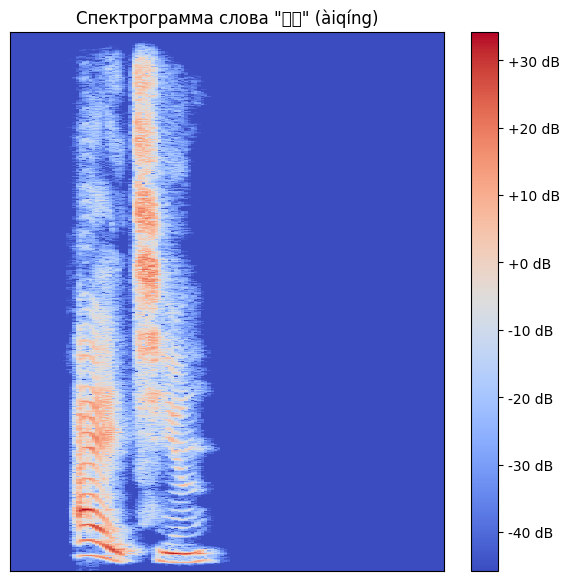

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–∫–∞—á–∏–≤–∞–Ω–∏—è —Ñ–∞–π–ª–∞ –ø–æ URL
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# –ü–æ–ª—É—á–∞–µ–º URL –ø–µ—Ä–≤–æ–≥–æ –∞—É–¥–∏–æ—Ñ–∞–π–ª–∞ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã
url = df['Audio File'].iloc[0]

# –°–∫–∞—á–∏–≤–∞–µ–º —Ñ–∞–π–ª
local_filename = 'word_1.mp3'
download_file(url, local_filename)

# –ó–∞–≥—Ä—É–∂–∞–µ–º –∞—É–¥–∏–æ—Ñ–∞–π–ª —Å –ø–æ–º–æ—â—å—é librosa
audio, sr = librosa.load(local_filename)

# –£–¥–∞–ª—è–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–π —Ñ–∞–π–ª (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
os.remove(local_filename)

# –°—Ç—Ä–æ–∏–º —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—É
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)
plt.colorbar(format='%+2.0f dB')
plt.title('–°–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ —Å–ª–æ–≤–∞ "Áà±ÊÉÖ" (√†iq√≠ng)')
plt.show()

<ipython-input-6-11328f96e958>:13: UserWarning: Glyph 29233 (\N{CJK UNIFIED IDEOGRAPH-7231}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-11328f96e958>:13: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29233 (\N{CJK UNIFIED IDEOGRAPH-7231}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


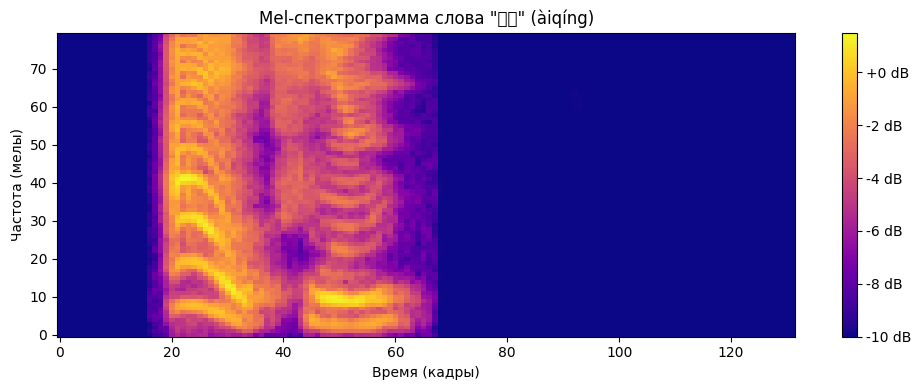

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã: (80, 132)


In [ ]:
# mel-spectrograms
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                         hop_length=512, n_mels=80,
                                         fmin=75, fmax=3700)

plt.figure(figsize=(10, 4))
plt.imshow(np.log10(mel_spec + 1e-10), aspect='auto',
           origin='lower', cmap=cm.plasma)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ —Å–ª–æ–≤–∞ "Áà±ÊÉÖ" (√†iq√≠ng)')
plt.xlabel('–í—Ä–µ–º—è (–∫–∞–¥—Ä—ã)')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞ (–º–µ–ª—ã)')
plt.tight_layout()
plt.show()

print(f"–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã: {mel_spec.shape}")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

_____
–ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å —Ç–∞–∫–∂–µ –∫–∞–∫ –≤ —Å–ª—É—á–∞–µ —Ä–∞–±–æ—Ç—ã —Å RNN, –≥–¥–µ –º—ã —Ä–∞–∑–¥–µ–ª—è–ª—è —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ Sxx, c mfcc

**–ï—Å–ª–∏ –¥–ª—è RNN –º—ã –ø–æ–¥–∞–≤–∞–ª–∏ –Ω–∞ –≤—Ö–æ–¥ Sxx, —Ç–æ –¥–ª—è CNN –±–æ–ª—å—à–µ –ø–æ–¥–æ–π–¥–µ—Ç mfcc:**

Sxx ‚Äì —ç—Ç–æ –≤—Ä–µ–º–µ–Ω–Ω–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–æ–≤ –º–æ—â–Ω–æ—Å—Ç–∏. RNN –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –∞ Sxx (—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞) ‚Äî —ç—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–æ–≤ —á–∞—Å—Ç–æ—Ç, –ø–æ—ç—Ç–æ–º—É –æ—Ç–ª–∏—á–Ω–æ –ø–æ–¥—Ö–æ–¥–∏—Ç. MFCC (Mel-Frequency Cepstral Coefficients) ‚Äî —ç—Ç–æ –∫–æ–º–ø–∞–∫—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å–ø–µ–∫—Ç—Ä–∞, –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ä–µ—á—å—é/–∑–≤—É–∫–æ–º. Mfcc –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è CNN, –ø–æ—Ç–æ–º—É —á—Ç–æ CNN —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—é—Ç —Å –ª–æ–∫–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ç—Ç–µ—Ä–Ω–∞–º–∏ –≤ –∫–æ–º–ø–∞–∫—Ç–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è—Ö.

–°—Ä–∞–∑—É –¥–µ–ª–∏—Ç—å —á–µ—Ä–µ–∑ mfcc –Ω–µ —É–¥–∞–ª–æ—Å—å, –¥–∞–Ω–Ω—ã—Ö —Ä–∞–∑–¥–µ–ª—è—é—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –í—ã–ø–æ–ª–Ω–∏—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –∫ –≤ —Å–ª—É—á–∞–µ RNN –ø–æ Sxx —Ç–∞–∫–∂–µ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –∏–∑–≤–ª–µ—á—å mfcc –≤–æ–∑–º–æ–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –∏–∑ –∞—É–¥–∏–æ—Ñ–∞–π–ª–∞.  

**–ü–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞, –Ω–æ –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å:**
1. –î–µ–ª–∏—Ç—å –∞—É–¥–∏–æ –ø–æ –≥—Ä–∞–Ω–∏—Ü–∞–º —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã
2. –î–µ–ª–∏—Ç—å –∞—É–¥–∏–æ –ø–æ –ø–∞—É–∑–µ ‚Äì –Ω–µ—Ç –æ—á–µ–≤–∏–¥–Ω–æ –ø–∞—É–∑—ã
3. –î–µ–ª–∏—Ç—å –∞—É–¥–∏–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ ‚Äì –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ç–∞–∫ –∫–∞–∫ –≤—Å–µ —Å–ª–æ–≥–∏ —Ä–∞–∑–Ω–æ–π –¥–ª–∏–Ω—ã
4. –î–µ–ª–∏—Ç—å –∞—É–¥–∏–æ –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏

**–ò—Ç–æ–≥–æ–≤—ã–π —Å–ø–æ—Å–æ–± —Ä–∞–∑–¥–µ–¥–µ–Ω–∏—è –∞—É–¥–∏–æ ‚Äì –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∞—É–¥–∏–æ –ø–æ —ç–Ω–µ—Ä–≥–µ—Ç–∏—á–µ—Å–∫–æ–º—É –±–∞–ª–∞–Ω—Å—É**

–ö–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å:
1. –ù–∞—Ö–æ–¥–∏–º –≥—Ä–∞–Ω–∏—Ü—É –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–π —ç–Ω–µ—Ä–≥–∏—è –∑–≤—É–∫–∞ –¥–æ –≥—Ä–∞–∏–Ω—Ü—ã –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–∞ —ç–Ω–µ—Ä–≥–∏–∏ –∑–≤—É–∫–∞ –ø–æ—Å–ª–µ –≥—Ä–∞–Ω–∏—Ü—ã,
2. –†–∞–∑–¥–µ–ª—è–µ–º –∞—É–¥–∏–æ –ø–æ —ç—Ç–æ–π –≥—Ä–∞–Ω–∏—Ü—ã –∏ –æ–±—Ä–µ–∑–∞–µ–º —Ç–∏—à–∏–Ω—É
2. –ò–∑ —É–∂–µ –æ–±—Ä–µ–∑–∞–Ω–Ω—ã—Ö –∞—É–¥–∏–æ –∏–∑–≤–ª–µ–∫–∞–µ–º mfcc

In [ ]:
nperseg = 1024
nfft = 1024 * 4
hop_length = 512
n_mfcc = 13
fixed_mfcc_time = 30


def load_audio(url):
    """–ó–∞–≥—Ä—É–∂–∞–µ—Ç mp3 –ø–æ url, –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç –≤–æ float64-–º–æ–Ω–æ–≤–æ–ª–Ω—ã —á–µ—Ä–µ–∑ librosa"""
    response = requests.get(url)
    audio = AudioSegment.from_mp3(BytesIO(response.content))
    audio.export("temp.wav", format="wav")
    y, sr = librosa.load("temp.wav", sr=None)
    return y, sr


def get_spectrogram(samples, fs):
    """–°–æ–∑–¥–∞—ë—Ç —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—É (Sxx) –∏–∑ –∞—É–¥–∏–æ—Å–∏–≥–Ω–∞–ª–∞"""
    f, t, Sxx = signal.spectrogram(samples, fs, nperseg=nperseg, nfft=nfft)
    Sxx = Sxx[:86]
    return Sxx


def split_spectrogram(Sxx):
    """–î–µ–ª–∏—Ç —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—É –Ω–∞ 2 —á–∞—Å—Ç–∏ –ø–æ –ª–æ–∫–∞–ª—å–Ω–æ–º—É –º–∏–Ω–∏–º—É–º—É"""
    q1 = Sxx.shape[1] // 4
    q3 = 3 * q1
    center = np.argmin(Sxx[:, q1:q3].max(axis=0))
    center += q1
    return trim_silences(Sxx[:, :center]), trim_silences(Sxx[:, center:]), center

def trim_silence_from_audio(samples, threshold=0.01):
    """–û–±—Ä–µ–∑–∞–µ—Ç —Ç–∏—à–∏–Ω—É –≤ –∞—É–¥–∏–æ—Å–∏–≥–Ω–∞–ª–µ –ø–æ –∞–º–ø–ª–∏—Ç—É–¥–µ"""
    energy = np.abs(samples)
    norm_energy = energy / np.max(energy) if np.max(energy) != 0 else energy
    mask = norm_energy > threshold
    if not np.any(mask):
        return samples
    start = np.argmax(mask)
    end = len(mask) - np.argmax(mask[::-1])
    return samples[start:end]

def get_mfcc_from_samples(samples, sr, max_len=fixed_mfcc_time):
    """–ò–∑–≤–ª–µ–∫–∞–µ—Ç MFCC –∏ –ø–∞–¥–∏—Ç/–æ–±—Ä–µ–∑–∞–µ—Ç –ø–æ –≤—Ä–µ–º–µ–Ω–∏"""
    mfcc = librosa.feature.mfcc(y=samples.astype(float), sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc



from scipy.signal import find_peaks

def find_split_by_energy_balance(samples, fs, frame_ms=10, hop_ms=5):
    """–ù–∞—Ö–æ–¥–∏—Ç —Ç–∞–∫—É—é —Ç–æ—á–∫—É, –≥–¥–µ —ç–Ω–µ—Ä–≥–∏—è —Å–ª–µ–≤–∞ ‚âà —ç–Ω–µ—Ä–≥–∏–∏ —Å–ø—Ä–∞–≤–∞"""
    frame_len = int(frame_ms / 1000 * fs)
    hop_len = int(hop_ms / 1000 * fs)

    energy = np.array([
        np.sum(np.abs(samples[i:i+frame_len])**2)
        for i in range(0, len(samples) - frame_len, hop_len)
    ])

    total_energy = np.sum(energy)
    cumulative_energy = np.cumsum(energy)
    split_idx = np.argmin(np.abs(cumulative_energy - total_energy / 2))
    split_sample = split_idx * hop_len

    return split_sample


def process_audio_from_url(url):
    samples, fs = load_audio(url)
    Sxx = get_spectrogram(samples, fs)
    Sxx1, Sxx2, _ = split_spectrogram(Sxx)

    # –ù–∞–¥—ë–∂–Ω–∞—è –≤–µ—Ä—Å–∏—è –¥–µ–ª–µ–Ω–∏—è
    split_sample = find_split_by_energy_balance(samples, fs)

    #–¥–µ–ª–∏–º –ø–æ —Ç–æ—á–∫–µ –±–µ–∑ —Å–¥–≤–∏–≥–æ–≤
    samples1 = trim_silence_from_audio(samples[:split_sample])
    samples2 = trim_silence_from_audio(samples[split_sample:])

    mfcc1 = get_mfcc_from_samples(samples1, fs)
    mfcc2 = get_mfcc_from_samples(samples2, fs)

    return mfcc1, mfcc2, Sxx, Sxx1, Sxx2, samples1, samples2, fs


In [ ]:
#–ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –ø–µ—Ä–≤—ã—Ö –ø—è—Ç–∏ —Å–ª–æ–≤–∞—Ö
for i in range(0,6):
  url = df['Audio File'].iloc[i]

  mfcc1, mfcc2, Sxx_full, Sxx1, Sxx2, samples1, samples2, fs = process_audio_from_url(url)
  print(f'–ê—É–¥–∏–æ –¥–ª—è —Å–ª–æ–≤–∞ {i}')
  print("üîä –°–ª–æ–≥ 1:")
  display(Audio(samples1, rate=fs))

  print("üîä –°–ª–æ–≥ 2:")
  display(Audio(samples2, rate=fs))


NameError: name 'trim_silences' is not defined

In [ ]:
# —Å–æ–∑–¥–∞–¥–∏–º –∫–ª–∞—Å—Å –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å–ª–æ–≤ —Ä–∞–∑–Ω–æ–π –¥–ª–∏–Ω—ã
class MFCCExtractor:
    def __init__(self, audio):
        self.audio = audio
        self.samples = None
        self.fs = None

    def load(self):
        """–ü—Ä–µ–≤—Ä–∞—â–∞–µ—Ç pydub.AudioSegment –≤ float-—Ñ–æ—Ä–º–∞—Ç –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏"""
        temp_path = "temp.wav"
        self.audio.export(temp_path, format="wav")
        self.samples, self.fs = librosa.load(temp_path, sr=None)

    def trim_silence_from_audio(self, samples, threshold=0.01):
        energy = np.abs(samples)
        norm_energy = energy / np.max(energy) if np.max(energy) > 0 else energy
        mask = norm_energy > threshold
        if not np.any(mask):
            return samples
        start = np.argmax(mask)
        end = len(mask) - np.argmax(mask[::-1])
        return samples[start:end]

    def get_mfcc(self, samples, max_len=30, n_mfcc=13):
        mfcc = librosa.feature.mfcc(y=samples.astype(float), sr=self.fs, n_mfcc=n_mfcc)
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        return mfcc

    def split_by_energy_balance(self, n_parts, frame_ms=10, hop_ms=5):
        frame_len = int(frame_ms / 1000 * self.fs)
        hop_len = int(hop_ms / 1000 * self.fs)

        energy = np.array([
            np.sum(np.abs(self.samples[i:i+frame_len])**2)
            for i in range(0, len(self.samples) - frame_len, hop_len)
        ])
        cumulative = np.cumsum(energy)
        total = cumulative[-1]

        targets = [i * total / n_parts for i in range(1, n_parts)]
        split_idxs = []
        for target in targets:
            idx = np.argmin(np.abs(cumulative - target))
            split_idxs.append(idx * hop_len)

        split_samples = []
        prev = 0
        for idx in split_idxs + [len(self.samples)]:
            split_samples.append(self.samples[prev:idx])
            prev = idx

        return split_samples

    def process(self, num_syllables):
        self.load()
        segments = self.split_by_energy_balance(num_syllables)
        mfccs = []
        for seg in segments:
            trimmed = self.trim_silence_from_audio(seg)
            mfcc = self.get_mfcc(trimmed)
            mfccs.append(mfcc)
        return mfccs


In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
def process_audio_df_mfcc(df):
    results = []

    for url, hanzi in zip(df['Audio File'], df['Word']):
        try:
            response = requests.get(url)
            audio = AudioSegment.from_mp3(BytesIO(response.content))
            processor = MFCCExtractor(audio)

            num_syllables = len(hanzi)  # –∏–ª–∏ –¥—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± –ø–æ–¥—Å—á—ë—Ç–∞
            mfcc_list = processor.process(num_syllables)

            results.append(mfcc_list)
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞ –¥–ª—è {url}: {e}")
            results.append([None])

    df['mfcc'] = results
    return df


In [ ]:
process_audio_df_mfcc(df)
df.head()

Audio File Word    Pinyin  \
id                                                                     
0   https://raw.githubusercontent.com/ManiyaRaskol...   Áà±ÊÉÖ    √†iq√≠ng   
1   https://raw.githubusercontent.com/ManiyaRaskol...   Ê†áÂáÜ  biƒÅozh«în   
2   https://raw.githubusercontent.com/ManiyaRaskol...   È•ºÂπ≤   b«ênggƒÅn   
3   https://raw.githubusercontent.com/ManiyaRaskol...   ÊùêÊñô   c√°ili√†o   
4   https://raw.githubusercontent.com/ManiyaRaskol...   Á™óÊà∑  chuƒÅngh√π   

            Meaning tones                                               mfcc  
id                                                                            
0   love (romantic)   4-2  [[[-415.5251818564494, -342.1774669164974, -26...  
1          standard   1-3  [[[-557.9863480884842, -489.4067299875443, -36...  
2           biscuit   3-1  [[[-543.9822530378947, -481.1007098884524, -37...  
3    data, material   2-4  [[[-611.9049645580998, -508.4091720161966, -44...  
4            window   1-4  [[[-464.60343669183914, -389.1524063846788, -3...

In [ ]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∏
df.isnull().sum()

Audio File    0
Word          0
Pinyin        0
Meaning       0
tones         1
mfcc          0
dtype: int64

–í –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –æ–¥–Ω–æ —Å–ª–æ–≤–æ —Å –Ω—É–ª–µ–≤—ã–º —Ç–æ–Ω–æ–≤ (–±–µ–∑ —Ç–æ–Ω–∞), –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç –æ–¥–∏–Ω –ø—Ä–æ–ø—É—Å–∫ –≤ —Å—Ç–æ–ª–±—Ü–µ tones, —É–¥–∞–ª–∏–º —ç—Ç—É —Å—Ç—Ä–æ–∫—É –∏–∑ –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
df = df.dropna()

–¢–µ–ø–µ—Ä—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é One-Hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–æ–ª–∂–Ω—ã –≤—ã–≥–ª—è–¥–µ—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

–¢–æ–Ω 1 ‚Üí [1, 0, 0, 0]

–¢–æ–Ω 2 ‚Üí [0, 1, 0, 0]

–¢–æ–Ω 3 ‚Üí [0, 0, 1, 0]

–¢–æ–Ω 4 ‚Üí [0, 0, 0, 1]

–í —Å–ª—É—á–∞–µ –º–Ω–æ–≥–æ—Å–ª–æ–∂–Ω—ã—Ö —Å–ª–æ–≤ –±—É–¥–µ—Ç —Å–æ–∑–¥–∞–Ω —Å–ø–∏—Å–æ–∫ —Å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∫–∞–∂–¥–æ–≥–æ —Ç–æ–Ω–∞.




In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∞—Ä–≥–µ—Ç–∞

def encode_tones(tones_str):
    tones = list(map(int, tones_str.split('-')))
    return [to_categorical(tone-1, num_classes=4) for tone in tones]

df['tones_onehot'] = df.tones.apply(encode_tones)

In [ ]:
df.head()

Audio File Word    Pinyin  \
id                                                                     
0   https://raw.githubusercontent.com/ManiyaRaskol...   Áà±ÊÉÖ    √†iq√≠ng   
1   https://raw.githubusercontent.com/ManiyaRaskol...   Ê†áÂáÜ  biƒÅozh«în   
2   https://raw.githubusercontent.com/ManiyaRaskol...   È•ºÂπ≤   b«ênggƒÅn   
3   https://raw.githubusercontent.com/ManiyaRaskol...   ÊùêÊñô   c√°ili√†o   
4   https://raw.githubusercontent.com/ManiyaRaskol...   Á™óÊà∑  chuƒÅngh√π   

            Meaning tones                                               mfcc  \
id                                                                             
0   love (romantic)   4-2  [[[-415.5251818564494, -342.1774669164974, -26...   
1          standard   1-3  [[[-557.9863480884842, -489.4067299875443, -36...   
2           biscuit   3-1  [[[-543.9822530378947, -481.1007098884524, -37...   
3    data, material   2-4  [[[-611.9049645580998, -508.4091720161966, -44...   
4            window   1-4  [[[-464.60343669183914, -389.1524063846788, -3...   

                                    tones_onehot  
id                                                
0   [[0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0]]  
1   [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]]  
2   [[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0]]  
3   [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]]  
4   [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

–°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å —Ä–∞–∑–±–∏–µ–Ω–∏–µ–º —Å–ª–æ–≤ –ø–æ —Å–ª–æ–≥–∞–º –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏.

In [ ]:
# —Å–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Å–ª–æ–≥–æ–≤
syllable_df = pd.DataFrame(columns=['mfcc', 'tone', 'word_id', 'syllable_pos'])

for word_id, (tones, spec) in enumerate(zip(df.tones_onehot, df.mfcc)):
    for syllable_pos, (tone_part, mfcc_part) in enumerate(zip(tones, spec)):
        syllable_df.loc[len(syllable_df)] = {
            'mfcc': mfcc_part,
            'tone': tone_part,
            'word_id': word_id,
            'syllable_pos': syllable_pos
        }
syllable_df

mfcc                  tone  \
0     [[-415.5251818564494, -342.1774669164974, -261...  [0.0, 0.0, 0.0, 1.0]   
1     [[-210.56845617039704, -222.48197431417623, -2...  [0.0, 1.0, 0.0, 0.0]   
2     [[-557.9863480884842, -489.4067299875443, -364...  [1.0, 0.0, 0.0, 0.0]   
3     [[-243.37299468108378, -258.3575051717519, -32...  [0.0, 0.0, 1.0, 0.0]   
4     [[-543.9822530378947, -481.1007098884524, -371...  [0.0, 0.0, 1.0, 0.0]   
...                                                 ...                   ...   
1070  [[-555.636543720578, -508.49304439111995, -469...  [0.0, 0.0, 0.0, 1.0]   
1071  [[-225.23346819359426, -238.56770265119826, -2...  [0.0, 0.0, 1.0, 0.0]   
1072  [[-366.1202472607046, -311.80401927627685, -30...  [0.0, 1.0, 0.0, 0.0]   
1073  [[-242.43892668070376, -281.8567607484765, -36...  [1.0, 0.0, 0.0, 0.0]   
1074  [[-188.09992497167602, -250.10089792801762, -4...  [0.0, 1.0, 0.0, 0.0]   

      word_id  syllable_pos  
0           0             0  
1           0             1  
2           1             0  
3           1             1  
4           2             0  
...       ...           ...  
1070      602             0  
1071      602             1  
1072      603             0  
1073      603             1  
1074      603             2  

[1075 rows x 4 columns]

–ü—Ä–æ–≤–µ—Ä–∏–º –≤—Å–µ –ª–∏ mfcc –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π –¥–ª–∏–Ω—ã –≤ –∏—Ç–æ–≥–æ–≤–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ, —Ç–∞–∫ –∫–∞–∫ –≤ –æ–±—Ä–∞—Ç–Ω–æ–º —Å–ª—É—á–∞–µ CNN –Ω–µ —Å–º–æ–∂–µ—Ç –∏—Ö –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å.

In [ ]:
set(mfcc.shape for mfcc in syllable_df['mfcc'])

{(13, 30)}

–í—Å–µ —Ö–æ—Ä–æ—à–æ, –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ–æ–µ–π–º —Å–æ–∑–¥–∞–Ω, —Ç–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É.

In [ ]:
# –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, —á—Ç–æ –º–µ–Ω—è–µ—Ç—Å—è (–≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç CNN) —Ç—Ä–∞–Ω—Å–ø–æ—Ä–∏—Ä—É–µ–º X (13, 30) ‚Äì> (30-13)

X = np.stack(syllable_df['mfcc'].to_list())
X = np.transpose(X, (0, 2, 1))

y = np.array(syllable_df['tone'].to_list())
y_raw = y.argmax(axis=1)


X_train, X_temp, y_train, y_temp, y_raw_train, y_raw_temp = train_test_split(
    X, y, y_raw, test_size=0.4, random_state=42, stratify=y_raw)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_raw_temp)

#–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (645, 30, 13) (645, 4)
Val: (215, 30, 13) (215, 4)
Test: (215, 30, 13) (215, 4)


# –°–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–∫–∞—á–∏–≤–∞–Ω–∏—è —Ñ–∞–π–ª–∞ –ø–æ URL
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

url = df['Audio File'].iloc[0]

# –°–∫–∞—á–∏–≤–∞–µ–º —Ñ–∞–π–ª—ã
local_ton_1 = download_file(url_ton_1, 'word_118.mp3')
local_ton_2 = download_file(url_ton_2, 'word_78.mp3')
local_ton_3 = download_file(url_ton_3, 'word_121.mp3')
local_ton_4 = download_file(url_ton_4, 'word_27.mp3')

# –ó–∞–≥—Ä—É–∂–∞–µ–º –∞—É–¥–∏–æ—Ñ–∞–π–ª—ã —Å –ø–æ–º–æ—â—å—é librosa
ton_1, sr1 = librosa.load(local_ton_1)
ton_2, sr2 = librosa.load(local_ton_2)
ton_3, sr3 = librosa.load(local_ton_3)
ton_4, sr4 = librosa.load(local_ton_4)

# –£–¥–∞–ª—è–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ñ–∞–π–ª—ã (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
os.remove(local_ton_1)
os.remove(local_ton_2)
os.remove(local_ton_3)
os.remove(local_ton_4)


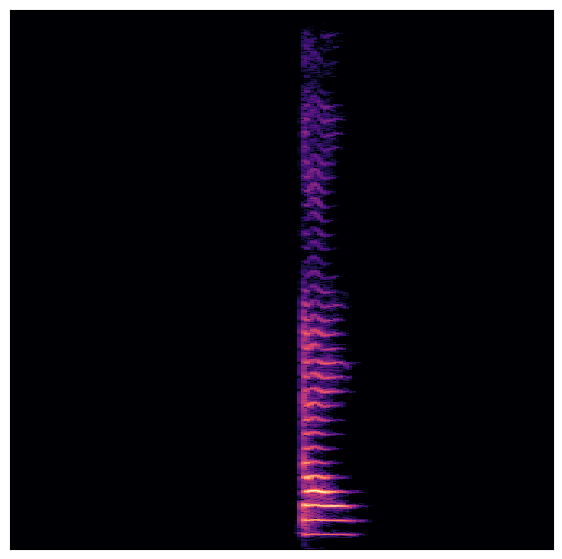

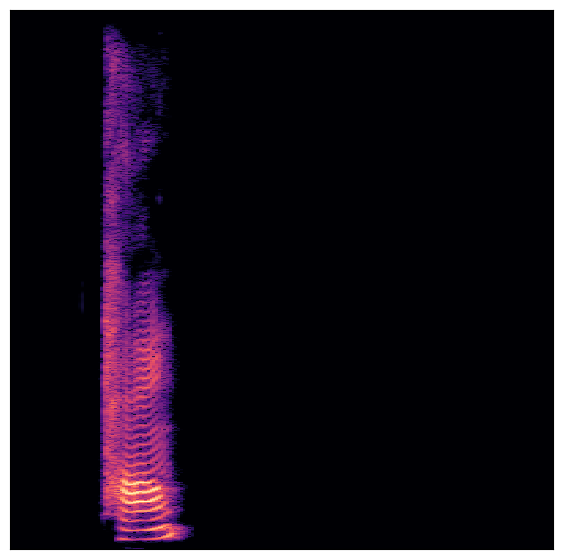

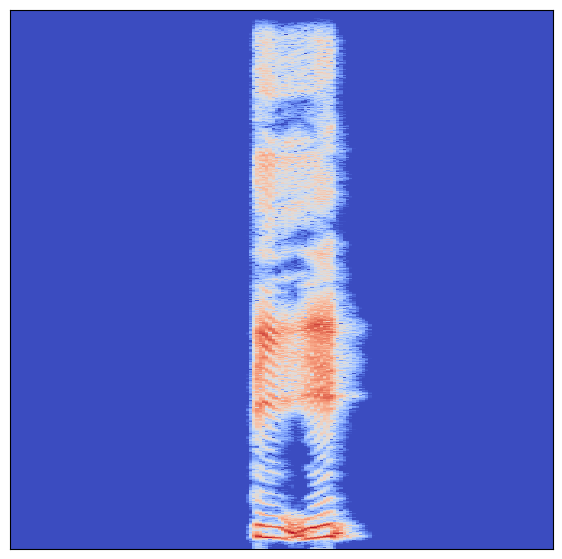

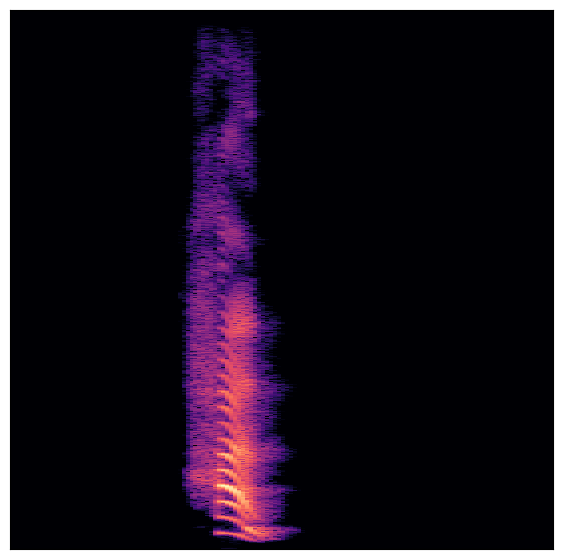

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–∏–º —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–æ–Ω–∞
X = librosa.stft(ton_1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)

X2 = librosa.stft(ton_2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb2)

X3 = librosa.stft(ton_3)
Xdb3 = librosa.amplitude_to_db(abs(X3))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb3)

X4 = librosa.stft(ton_4)
Xdb4 = librosa.amplitude_to_db(abs(X4))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb4)


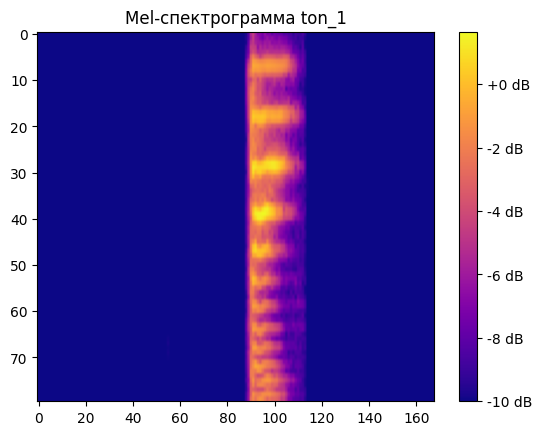

(80, 168)


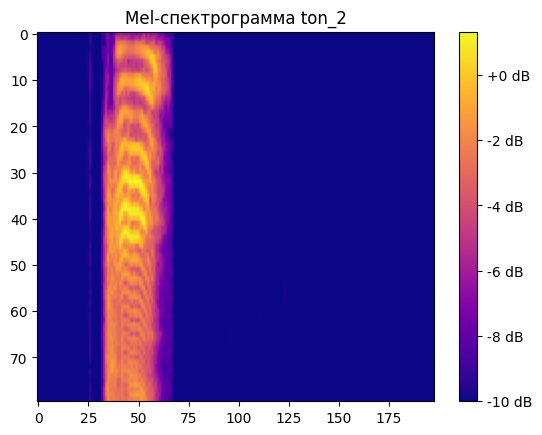

(80, 198)


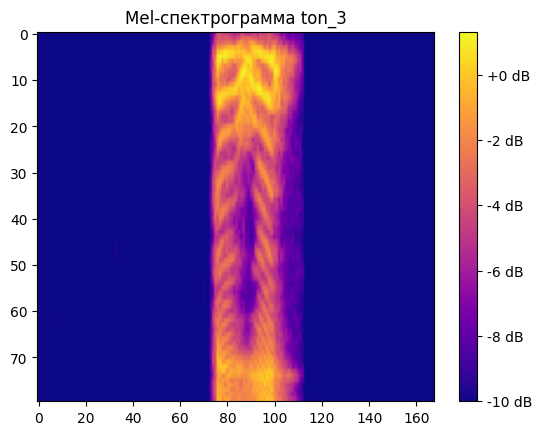

(80, 168)


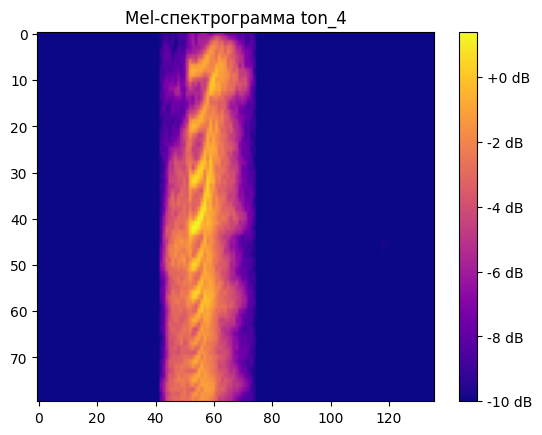

(80, 136)


In [ ]:
# mel-spectrograms
import matplotlib.cm as cm

# Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã
mel1 = librosa.feature.melspectrogram(y=ton_1, sr=sr1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ ton_1')
plt.show()
print(mel1.shape)

mel2 = librosa.feature.melspectrogram(y=ton_2, sr=sr2, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel2 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ ton_2')
plt.show()
print(mel2.shape)

mel3 = librosa.feature.melspectrogram(y=ton_3, sr=sr3, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel3 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ ton_3')
plt.show()
print(mel3.shape)

mel4 = librosa.feature.melspectrogram(y=ton_4, sr=sr4, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel4 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-—Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ ton_4')
plt.show()
print(mel4.shape)


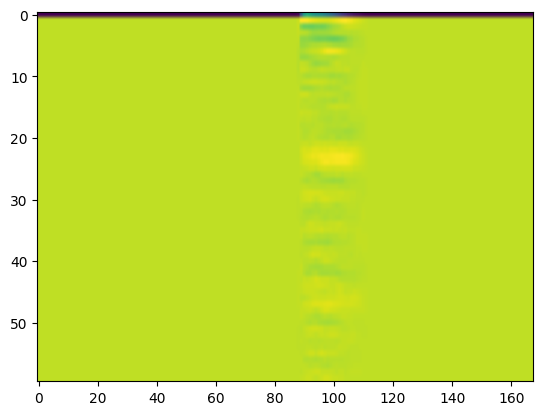

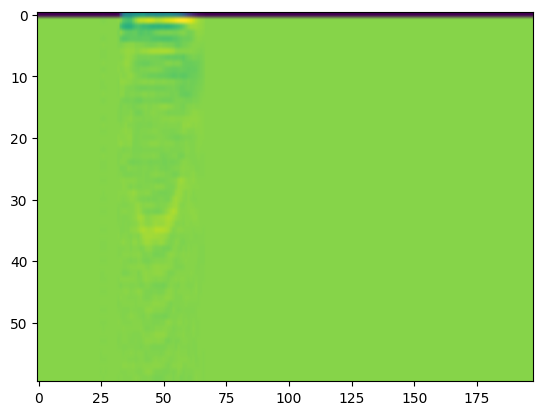

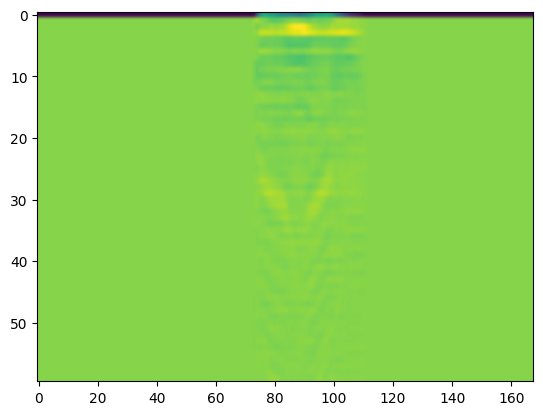

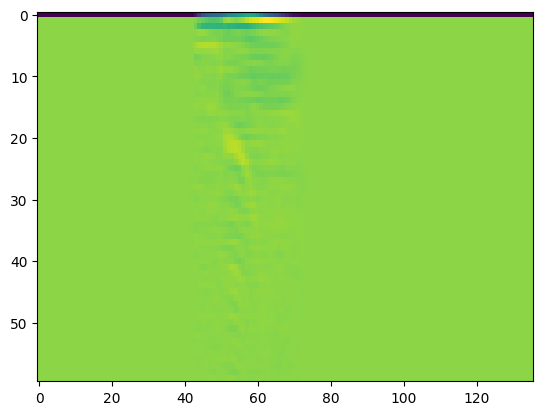

(60, 136)


In [ ]:
# MFCC ‚Äì –º–µ–ª-—á–∞—Å—Ç–æ—Ç–Ω—ã–π –∫–µ–ø—Å—Ç—Ä –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω–æ–≥–æ —Å–ø–µ–∫—Ç—Ä–∞ –º–æ—â–Ω–æ—Å—Ç–∏ –∑–≤—É–∫–∞

mfcc = librosa.feature.mfcc(y=ton_1, sr=sr1, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=ton_2, sr=sr2, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=ton_3, sr=sr3, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=ton_4, sr=sr4, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()
print(mfcc.shape)

def mp3tomfcc(file_path, max_pad):
  audio, sample_rate = librosa.core.load(file_path)
  mfcc = librosa.feature.mfcc(y=ton, sr=sr, n_mfcc=60)
  pad_width = max_pad - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  return mfcc


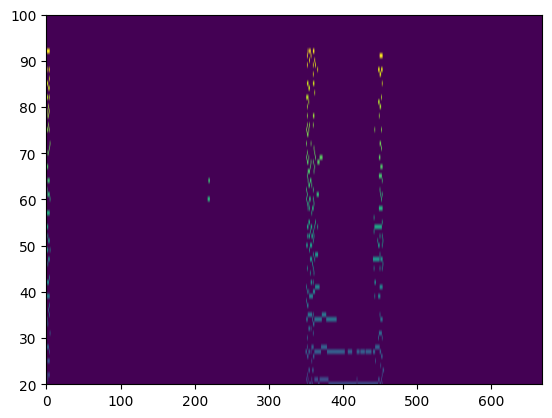

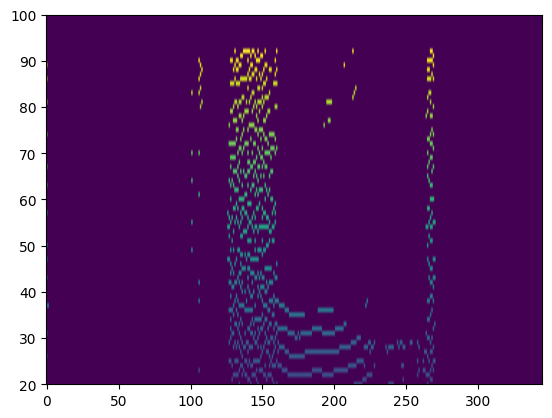

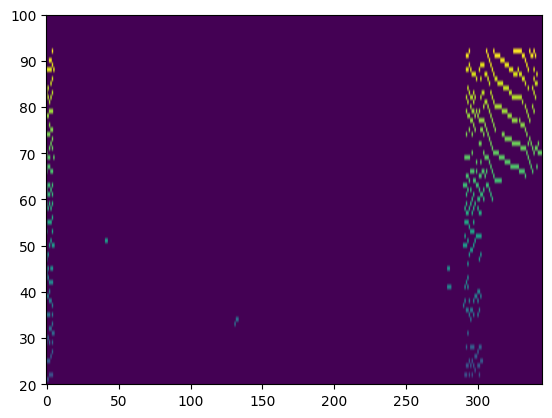

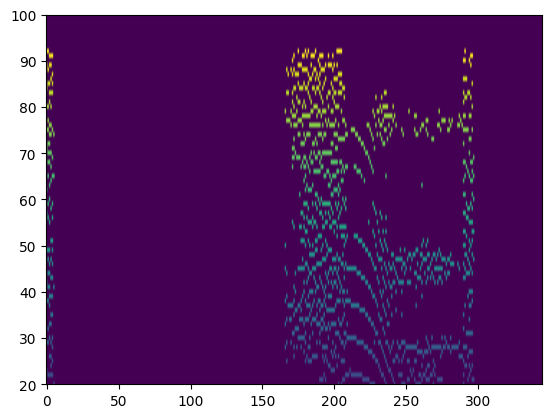

In [ ]:
# Pitch (—è —Ç–∞–∫ –ø–æ–Ω—è–ª–∞ –∏–∑–º–µ—Ä—è–µ—Ç —á–∞—Å—Ç–æ—Ç—É —Ç–æ–Ω–∞)

pitch, mag = librosa.core.piptrack(y=ton_1, sr=sr1, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(y=ton_2[0:sr2*2], sr=sr2, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(y=ton_3[0:sr3*2], sr=sr3, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(y=ton_4[0:sr4*2], sr=sr4, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()



# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [ ]:
# —Å–æ–∑–¥–∞–µ–º —Å–ª–æ–∏ Transformer
def transformer_block(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    x_ff = layers.Dense(ff_dim, activation="relu")(x)
    x_ff = layers.Dense(inputs.shape[-1])(x_ff)
    x = layers.Dropout(dropout)(x_ff)
    return layers.LayerNormalization(epsilon=1e-6)(x + x_ff)

# —Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å
def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)  # (30, 13)
    x = transformer_block(inputs)
    x = transformer_block(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return models.Model(inputs, outputs)


In [ ]:
#–æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

model = build_model(input_shape=(30, 13), num_classes=4)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# —É—Å—Ç–∞–Ω–∞–≤–ª—è–∏–≤–∞–µ–º –≤–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_raw_train), y=y_raw_train)
class_weights = dict(enumerate(cw))

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 67ms/step - accuracy: 0.2435 - loss: 1.4222 - val_accuracy: 0.3163 - val_loss: 1.3611
Epoch 2/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 57ms/step - accuracy: 0.3323 - loss: 1.3444 - val_accuracy: 0.3116 - val_loss: 1.3476
Epoch 3/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 56ms/step - accuracy: 0.2992 - loss: 1.3224 - val_accuracy: 0.3581 - val_loss: 1.3056
Epoch 4/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 33ms/step - accuracy: 0.3818 - loss: 1.2536 - val_accuracy: 0.3581 - val_loss: 1.2962
Epoch 5/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 34ms/step - accuracy: 0.4366 - loss: 1.1991 - val_accuracy: 0.4140 - val_loss: 1.2387
Epoch 6/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 36ms/step - accuracy: 0.4811 - loss: 1.1308 - val_accuracy: 0.4093 - val_loss: 1.25

# –û—Ü–µ–Ω–∫–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

In [ ]:
model.evaluate(X_test, y_test, batch_size=3, verbose=1)

72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.4745 - loss: 1.2854


[1.303512454032898, 0.45116278529167175]

In [ ]:
#–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–µ—Ä–µ–æ–±—á—É–µ–Ω–∏–µ
model.evaluate(X_train, y_train, batch_size=3, verbose=1)

215/215 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.5625 - loss: 0.9272


[0.9026582837104797, 0.5720930099487305]

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 261ms/step


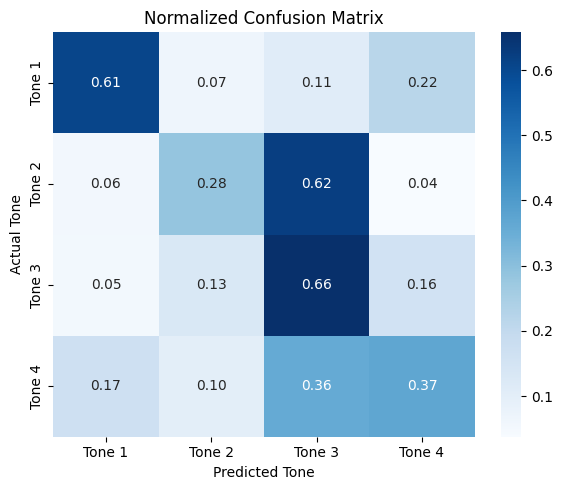

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫

y_pred_proba = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True,
            xticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'],
            yticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'])

plt.ylabel('Actual Tone')
plt.xlabel('Predicted Tone')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'],
    digits=2
)
print(report)

              precision    recall  f1-score   support

      Tone 1       0.61      0.61      0.61        46
      Tone 2       0.48      0.28      0.36        53
      Tone 3       0.27      0.66      0.39        38
      Tone 4       0.62      0.37      0.46        78

    accuracy                           0.45       215
   macro avg       0.50      0.48      0.45       215
weighted avg       0.52      0.45      0.46       215



In [ ]:
# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º
precision_macro = precision_score(y_true_labels, y_pred_labels, average='macro')
recall_macro    = recall_score(y_true_labels, y_pred_labels, average='macro')
f1_macro        = f1_score(y_true_labels, y_pred_labels, average='macro')

print("–£—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:")
print(f"Precision: {precision_macro:.2f}")
print(f"Recall:    {recall_macro:.2f}")
print(f"F1-score:  {f1_macro:.2f}")


–£—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:
Precision: 0.50
Recall:    0.48
F1-score:  0.45


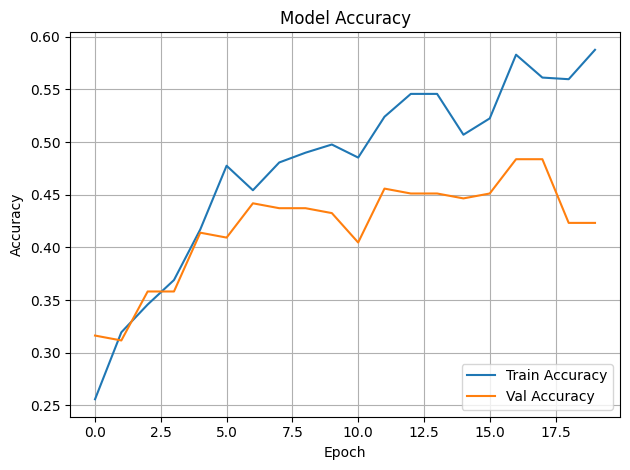

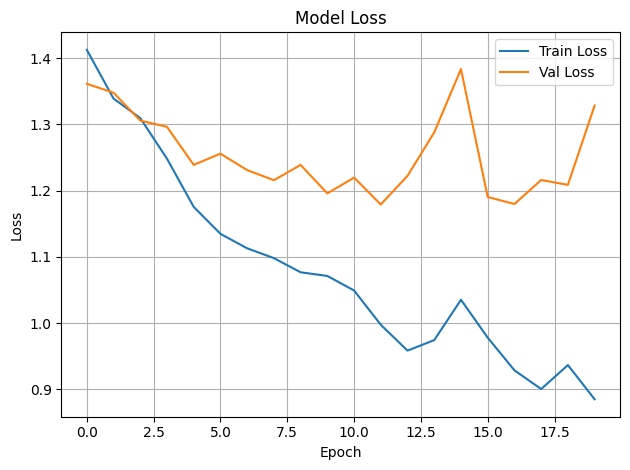

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()



–ü–æ—Å–∫–æ–ª—å–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å —Ö—É–∂–µ –æ–∂–∏–¥–∞–µ–º—ã—Ö, –ø–æ–ø—Ä–æ–±—É–µ–º —É—Å–ª–æ–∂–Ω–∏—Ç—å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —ç–Ω–∫–æ–¥–µ—Ä–∞.

**–ò–∑–º–µ–Ω–µ–Ω–∏—è:**
1. –î–æ–±–∞–≤–ª–µ–Ω Positional Encoding (—á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –ø–æ–Ω–∏–º–∞–ª–∞ –∫–∞–∫–æ–π MFCC –ø–æ—Ä—è–¥–æ–∫)
2. –£–≤–µ–ª–∏—á–µ–Ω–æ —á–∏—Å–ª–æ attention-–±–ª–æ–∫–æ–≤ (—Å 2 –¥–æ 3) ‚Äì –∫–∞–∫ —è –ø–æ—è–Ω—è–ª–∞, –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–π
3. –£–≤–µ–ª–∏—á–∏–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: head_size=128, num_heads=4, ff_dim=256 ‚Äì –¥–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫ –æ–±—É—á–µ–Ω–∏—é
4. –î–æ–±–∞–≤–ª–µ–Ω Dropout ‚Äì –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è

In [ ]:
class PositionalEncoding(layers.Layer):
    def __init__(self):
        super().__init__()

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        pos_encoding = tf.cast(positions[:, tf.newaxis], tf.float32)
        pos_encoding = tf.tile(pos_encoding, [1, tf.shape(x)[2]])
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return x + pos_encoding

def transformer_block(inputs, head_size=128, num_heads=4, ff_dim=256, dropout=0.2):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    ff = layers.Dense(ff_dim, activation="relu")(x)
    ff = layers.Dense(inputs.shape[-1])(ff)
    x = layers.Dropout(dropout)(ff)
    return layers.LayerNormalization(epsilon=1e-6)(x + ff)


def build_improved_transformer(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)  # (30, 13)
    x = PositionalEncoding()(inputs)

    for _ in range(3):  # –±–æ–ª—å—à–µ attention-–±–ª–æ–∫–æ–≤
        x = transformer_block(x, head_size=128, num_heads=4, ff_dim=256, dropout=0.2)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return models.Model(inputs, outputs)


In [ ]:
#–æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

model = build_model(input_shape=(30, 13), num_classes=4)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# —É—Å—Ç–∞–Ω–∞–≤–ª—è–∏–≤–∞–µ–º –≤–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_raw_train), y=y_raw_train)
class_weights = dict(enumerate(cw))

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 115ms/step - accuracy: 0.2577 - loss: 1.4193 - val_accuracy: 0.2605 - val_loss: 1.3984
Epoch 2/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 94ms/step - accuracy: 0.2424 - loss: 1.3718 - val_accuracy: 0.2791 - val_loss: 1.3652
Epoch 3/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 92ms/step - accuracy: 0.2982 - loss: 1.3880 - val_accuracy: 0.2791 - val_loss: 1.3766
Epoch 4/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 127ms/step - accuracy: 0.3226 - loss: 1.3047 - val_accuracy: 0.3256 - val_loss: 1.3482
Epoch 5/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 90ms/step - accuracy: 0.3595 - loss: 1.3033 - val_accuracy: 0.3302 - val_loss: 1.3340
Epoch 6/20
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 95ms/step - accuracy: 0.3510 - loss: 1.2744 - val_accuracy: 0.3442 - val_loss: 1.

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 255ms/step


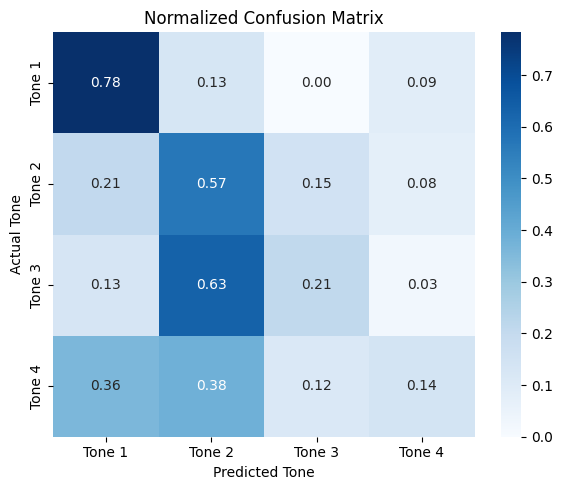

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫

y_pred_proba = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True,
            xticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'],
            yticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'])

plt.ylabel('Actual Tone')
plt.xlabel('Predicted Tone')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'],
    digits=2
)
print(report)

              precision    recall  f1-score   support

      Tone 1       0.45      0.78      0.57        46
      Tone 2       0.33      0.57      0.42        53
      Tone 3       0.32      0.21      0.25        38
      Tone 4       0.55      0.14      0.22        78

    accuracy                           0.40       215
   macro avg       0.41      0.43      0.37       215
weighted avg       0.43      0.40      0.35       215



In [ ]:
# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º
precision_macro = precision_score(y_true_labels, y_pred_labels, average='macro')
recall_macro    = recall_score(y_true_labels, y_pred_labels, average='macro')
f1_macro        = f1_score(y_true_labels, y_pred_labels, average='macro')

print("–£—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:")
print(f"Precision: {precision_macro:.2f}")
print(f"Recall:    {recall_macro:.2f}")
print(f"F1-score:  {f1_macro:.2f}")


–£—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:
Precision: 0.41
Recall:    0.43
F1-score:  0.37


–ï—Å–ª–∏ —Ä–∞–Ω—å—à–µ –º–æ–¥–µ–ª—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–ª–∞ T2 –∏ —á–∞—Å—Ç–æ –æ—Ç–Ω–æ—Å–∏–ª–∞ –∫ T3 —Ç–æ–Ω–∞ 2 –∏ 4, —Ç–æ —Å–µ–π—á–∞—Å –º–æ–¥–µ–ª—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç T3 –∏ T4, –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –æ—à–∏–±–æ—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ç–æ–Ω –∫–∞–∫ T2.

# –ú–æ–¥–µ–ª—å Wav2Vec 2.0 –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å—ã—Ä—ã—Ö –∞—É–¥–∏–æ—Ñ–∞–π–ª–æ–≤

In [ ]:
import soundfile as sf

In [ ]:
# –∞–¥–∞–ø—Ç–∏—Ä—É–µ–º —Å–ª–∞—Å—Å –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è mfcc –ø–æ–¥ –∑–∞–¥–∞—á—É ‚Äì –æ–±—Ä–µ–∑–∫–∞ –∞—É–¥–∏–æ –∏ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç wav

class AudioSyllableSplitter:
    def __init__(self, audio, word_id, base_name, save_dir="sliced_audio"):
        self.audio = audio
        self.word_id = word_id
        self.base_name = base_name
        self.save_dir = save_dir
        self.samples = None
        self.fs = None

    def load(self):
        """–ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç –≤ wav"""
        os.makedirs(self.save_dir, exist_ok=True)
        temp_path = "temp_audio.wav"
        self.audio.export(temp_path, format="wav")
        self.samples, self.fs = librosa.load(temp_path, sr=None)

    def trim_silence_from_audio(self, samples, threshold=0.01):
        energy = np.abs(samples)
        norm_energy = energy / np.max(energy) if np.max(energy) > 0 else energy
        mask = norm_energy > threshold
        if not np.any(mask):
            return samples
        start = np.argmax(mask)
        end = len(mask) - np.argmax(mask[::-1])
        return samples[start:end]

    def split_by_energy_balance(self, n_parts, frame_ms=10, hop_ms=5):
        frame_len = int(frame_ms / 1000 * self.fs)
        hop_len = int(hop_ms / 1000 * self.fs)

        energy = np.array([
            np.sum(np.abs(self.samples[i:i+frame_len])**2)
            for i in range(0, len(self.samples) - frame_len, hop_len)
        ])
        cumulative = np.cumsum(energy)
        total = cumulative[-1]

        targets = [i * total / n_parts for i in range(1, n_parts)]
        split_idxs = []
        for target in targets:
            idx = np.argmin(np.abs(cumulative - target))
            split_idxs.append(idx * hop_len)

        split_samples = []
        prev = 0
        for idx in split_idxs + [len(self.samples)]:
            split_samples.append(self.samples[prev:idx])
            prev = idx

        return split_samples

    def process(self, num_syllables):
        self.load()
        segments = self.split_by_energy_balance(num_syllables)
        paths = []
        for i, seg in enumerate(segments):
            trimmed = self.trim_silence_from_audio(seg)
            file_name = f"{self.base_name}_{self.word_id}_syl{i+1}.wav"
            file_path = os.path.join(self.save_dir, file_name)
            sf.write(file_path, trimmed, self.fs)
            paths.append(file_path)
        return paths


In [ ]:
def process_audio_df_wav_syllables(df, save_dir="sliced_audio"):
    results = []

    for idx, (url, word) in enumerate(zip(df['Audio File'], df['Word'])):
        try:
            response = requests.get(url)
            audio = AudioSegment.from_mp3(BytesIO(response.content))

            splitter = AudioSyllableSplitter(audio, word_id=idx, base_name=word, save_dir=save_dir)
            syllable_paths = splitter.process(num_syllables=len(word))  # –∫–æ–ª-–≤–æ –∏–µ—Ä–æ–≥–ª–∏—Ñ–æ–≤

            results.append(syllable_paths)
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞ –¥–ª—è {url}: {e}")
            results.append([])

    df['syllable_paths'] = results
    return df


In [ ]:
process_audio_df_wav_syllables(df)
df.head()

Audio File Word    Pinyin  \
id                                                                     
0   https://raw.githubusercontent.com/ManiyaRaskol...   Áà±ÊÉÖ    √†iq√≠ng   
1   https://raw.githubusercontent.com/ManiyaRaskol...   Ê†áÂáÜ  biƒÅozh«în   
2   https://raw.githubusercontent.com/ManiyaRaskol...   È•ºÂπ≤   b«ênggƒÅn   
3   https://raw.githubusercontent.com/ManiyaRaskol...   ÊùêÊñô   c√°ili√†o   
4   https://raw.githubusercontent.com/ManiyaRaskol...   Á™óÊà∑  chuƒÅngh√π   

            Meaning tones                                               mfcc  \
id                                                                             
0   love (romantic)   4-2  [[[-415.5251818564494, -342.1774669164974, -26...   
1          standard   1-3  [[[-557.9863480884842, -489.4067299875443, -36...   
2           biscuit   3-1  [[[-543.9822530378947, -481.1007098884524, -37...   
3    data, material   2-4  [[[-611.9049645580998, -508.4091720161966, -44...   
4            window   1-4  [[[-464.60343669183914, -389.1524063846788, -3...   

                                    tones_onehot  \
id                                                 
0   [[0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0]]   
1   [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]]   
2   [[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0]]   
3   [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]]   
4   [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]]   

                                       syllable_paths  
id                                                     
0   [sliced_audio/Áà±ÊÉÖ_0_syl1.wav, sliced_audio/Áà±ÊÉÖ_0...  
1   [sliced_audio/Ê†áÂáÜ_1_syl1.wav, sliced_audio/Ê†áÂáÜ_1...  
2   [sliced_audio/È•ºÂπ≤_2_syl1.wav, sliced_audio/È•ºÂπ≤_2...  
3   [sliced_audio/ÊùêÊñô_3_syl1.wav, sliced_audio/ÊùêÊñô_3...  
4   [sliced_audio/Á™óÊà∑_4_syl1.wav, sliced_audio/Á™óÊà∑_4...

In [ ]:
# —Å–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Å–ª–æ–≥–æ–≤
syllable_df = pd.DataFrame(columns=['audio_wav', 'tone', 'word_id', 'syllable_pos'])

for word_id, (tone_list, path_list) in enumerate(zip(df['tones_onehot'], df['syllable_paths'])):
    for syllable_pos, (tone, audio_path) in enumerate(zip(tone_list, path_list)):
        syllable_df.loc[len(syllable_df)] = {
            'audio_wav': audio_path,
            'tone': tone,
            'word_id': word_id,
            'syllable_pos': syllable_pos
        }

syllable_df.head()


audio_wav                  tone  word_id  syllable_pos
0  sliced_audio/Áà±ÊÉÖ_0_syl1.wav  [0.0, 0.0, 0.0, 1.0]        0             0
1  sliced_audio/Áà±ÊÉÖ_0_syl2.wav  [0.0, 1.0, 0.0, 0.0]        0             1
2  sliced_audio/Ê†áÂáÜ_1_syl1.wav  [1.0, 0.0, 0.0, 0.0]        1             0
3  sliced_audio/Ê†áÂáÜ_1_syl2.wav  [0.0, 0.0, 1.0, 0.0]        1             1
4  sliced_audio/È•ºÂπ≤_2_syl1.wav  [0.0, 0.0, 1.0, 0.0]        2             0

In [ ]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")
model.eval()

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Wav2Vec2Model(
  (feature_extractor): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2GroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Wav2Vec2Encoder(
    (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
  

In [ ]:
#–∏–∑–≤–ª–µ–∫–∞–µ–º —ç–º–±–µ–¥–∏–Ω–≥–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≥–∞

import torchaudio
import torch

def extract_wav2vec_embedding(wav_path, target_sr=16000):
    # –ó–∞–≥—Ä—É–∂–∞–µ–º .wav —Ñ–∞–π–ª
    waveform, sr = torchaudio.load(wav_path)

    # –ü—Ä–∏–≤–æ–¥–∏–º –∫ 16kHz
    if sr != target_sr:
        waveform = torchaudio.functional.resample(waveform, orig_freq=sr, new_freq=target_sr)

    # –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)

    # –ì–æ—Ç–æ–≤–∏–º –≤—Ö–æ–¥ –¥–ª—è –º–æ–¥–µ–ª–∏
    inputs = processor(waveform.squeeze().numpy(), sampling_rate=target_sr, return_tensors="pt")

    # –ü–æ–ª—É—á–∞–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥
    with torch.no_grad():
        outputs = model(inputs.input_values).last_hidden_state  # (1, T, 768)
        vec = outputs.mean(dim=1).squeeze().numpy()             # ‚Üí (768,)
    return vec


In [ ]:
# –ø—Ä–∏–º–µ–Ω—è–µ–º –∫ —Ç–∞–±–ª–∏—Ü–µ
X = []
y = []

for _, row in syllable_df.iterrows():
    try:
        vec = extract_wav2vec_embedding(row['audio_wav'])
        X.append(vec)
        y.append(np.argmax(row['tone']))
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ —Å —Ñ–∞–π–ª–æ–º {row['audio_wav']}: {e}")


In [ ]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56        68
           1       0.64      0.61      0.63        80
           2       0.52      0.50      0.51        58
           3       0.67      0.74      0.70       117

    accuracy                           0.62       323
   macro avg       0.61      0.60      0.60       323
weighted avg       0.62      0.62      0.62       323



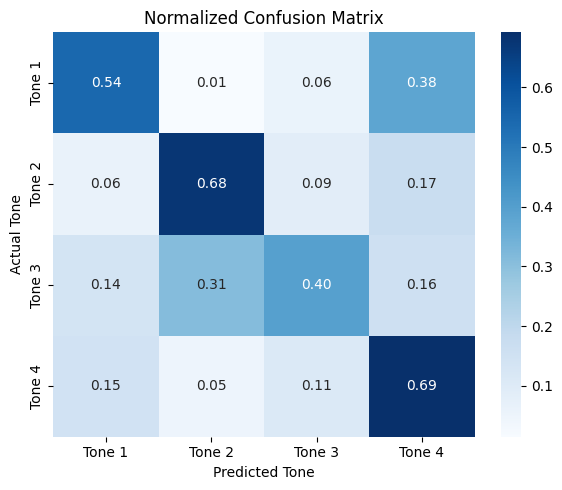

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫
y_pred_labels = clf.predict(X_test)
y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True,
            xticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'],
            yticklabels=['Tone 1', 'Tone 2', 'Tone 3', 'Tone 4'])

plt.ylabel('Actual Tone')
plt.xlabel('Predicted Tone')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()
